Lab: Implement Entropy & K-L Divergence
====

By The End Of This Lab You Should Be Able To:
----

- Write Python code to calculate the entropy of a discrete distribution
- Write Python code to calculate the K-L Divergence between discrete distributions

dit package
----

dit is a Python package for information theory.

[RTFM](http://docs.dit.io/en/latest/)

In [107]:
reset -fs

In [108]:
import sys
import subprocess

try:
    import dit
except ImportError:
    import pip
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'dit'])
    import dit

In [109]:
# Setup for dit package
outcomes = "🐶 👹 🐯 🐲".split() # Define discrete Random Variable
outcome_probabilities = [0.20, 0.30, 0.25, 0.25] # Created weighted outcomes
assert sum(outcome_probabilities) == 1 # Sanity check
d = dit.Distribution(outcomes, outcome_probabilities) # Create instance

# Let's check it out
print(d)
print()
print(f"The probability of getting a {outcomes[0]} is: {d[outcomes[0]]}")
print(f"The probability of getting a {outcomes[0]} and {outcomes[1]} is: {d.event_probability([outcomes[0], outcomes[1]])}")

Class:          Distribution
Alphabet:       ('🐯', '🐲', '🐶', '👹') for all rvs
Base:           linear
Outcome Class:  str
Outcome Length: 1
RV Names:       None

x   p(x)
🐯   0.25
🐲   0.25
🐶   0.2
👹   0.3

The probability of getting a 🐶 is: 0.2
The probability of getting a 🐶 and 👹 is: 0.5


In [110]:
print(f"The Shannon entropy of this pmf is: {dit.shannon.entropy(d):.4f}")

The Shannon entropy of this pmf is: 1.9855


In [111]:
import math
import numpy as np

In [28]:
outcomes = '🧟 🧙'.split()
outcome_probabilities = [0, 1]
dit.shannon.entropy(d)

0.7219280948873623

In [31]:
from typing import List

def shannon_entropy(outcome_probabilities: List[float]) -> float:
    """Implement Shannon entropy function.
    You may use any math or numpy method. 
    You may NOT use any other package, including `scipy.stats.entropy`
    If you use another package, you'll get zero points.
    """ 
    import math
    import numpy as np
    
    def entropy(x):
        if x > 0:
            return -x*math.log(x,2)
        else:
            return 0
    H = sum([entropy(l) for l in outcome_probabilities])
    
    return H

In [32]:
"""
2 points
Test code for the 'shannon_entropy' function. 
This cell should NOT give any errors when it is run.
"""
from math import isclose

outcomes = '🧟 🧙'.split()
outcome_probabilities = [0, 1]
assert sum(outcome_probabilities) == 1 # Sanity check
d = dit.Distribution(outcomes, outcome_probabilities)
assert isclose(dit.shannon.entropy(d), shannon_entropy(outcome_probabilities))

outcomes = '🧖 🧗'.split()
outcome_probabilities = [0.2, 0.8]
assert sum(outcome_probabilities) == 1 # Sanity check
d = dit.Distribution(outcomes, outcome_probabilities)
assert isclose(dit.shannon.entropy(d), shannon_entropy(outcome_probabilities))

outcomes = "🐶 👹 🐯 🐲".split()
outcome_probabilities = [0.35, 0.15, 0.25, 0.25]
assert sum(outcome_probabilities) == 1 # Sanity check
d = dit.Distribution(outcomes, outcome_probabilities)
assert isclose(dit.shannon.entropy(d), shannon_entropy(outcome_probabilities))

In [50]:
def decrease_entropy(probabilities_orginal: List[float]) -> List[float]:
    "Manually change the individual entries to decrease the overall entropy."
    catch = 0.01
    probabilities_updated = probabilities_orginal.copy()
    start = probabilities_updated[0]
    if start == 1:
        return probabilities_orginal
    for i in range(1,len(probabilities_updated)):
        if probabilities_updated[i] >= start and probabilities_updated[i]\
        <= 1-catch and start >= catch:
            start-=catch
            probabilities_updated[i]+=catch
    if probabilities_updated[0] == start:
        start+=catch
        probabilities_updated[1]-=catch
    probabilities_updated[0] = start
#     raise NotImplementedError()
    return probabilities_updated

In [51]:
"""
1 point
Test code for the 'decrease_entropy' function. 
This cell should NOT give any errors when it is run.
"""

outcomes = "🐶 👹 🐯 🐲".split()
probabilities_orginal = [0.35, 0.15, 0.25, 0.25]
probabilities_updated = decrease_entropy(probabilities_orginal)
assert sum(probabilities_updated) == 1 # Sanity check
d = dit.Distribution(outcomes, probabilities_updated)
assert dit.shannon.entropy(d) < 1.94

In [36]:
def increase_entropy(probabilities_orginal: List[float]) -> List[float]:
    "Manually change the individual entries to increase the overall entropy."
    avg = sum(probabilities_orginal)/len(probabilities_orginal)
    probabilities_updated = []
    for i in range(len(probabilities_orginal)):
        probabilities_updated.append(avg)
    # YOUR CODE HERE
    # raise NotImplementedError()
    return probabilities_updated

In [37]:
"""
1 point
Test code for the 'increase_entropy' function. 
This cell should NOT give any errors when it is run.
"""

outcomes = "🐶 👹 🐯 🐲".split()
probabilities_orginal = [0.35, 0.15, 0.25, 0.25]
probabilities_updated = increase_entropy(probabilities_orginal)
assert sum(probabilities_updated) == 1 # Sanity check
d = dit.Distribution(outcomes, probabilities_updated)
assert dit.shannon.entropy(d) > 1.94

In [55]:
def maximum_entropy(probabilities_orginal: List[float]) -> List[float]:
    "Manually change the individual entries to maximize the overall entropy."
    avg = sum(probabilities_orginal)/len(probabilities_orginal)
    probabilities_updated = []
    for i in range(len(probabilities_orginal)):
        probabilities_updated.append(avg)    
    # YOUR CODE HERE
    # raise NotImplementedError()
    return probabilities_updated

In [56]:
"""
1 point
Test code for the 'maximum_entropy' function. 
This cell should NOT give any errors when it is run.
"""

outcomes = "🐶 👹 🐯 🐲".split()
probabilities_orginal = [0.35, 0.15, 0.25, 0.25]
probabilities_updated = maximum_entropy(probabilities_orginal)
assert sum(probabilities_updated) == 1 # Sanity check
d = dit.Distribution(outcomes, probabilities_updated)
assert dit.shannon.entropy(d) == 2

In [61]:
def minimum_entropy(probabilities_orginal: List[float]) -> List[float]:
    "Manually change the individual entries to minimumize the overall entropy."
    probabilities_updated = probabilities_orginal
    probabilities_updated[0] = 1
    for i in range(1,len(probabilities_orginal)):
        probabilities_updated[i] = 0
    # YOUR CODE HERE
    # raise NotImplementedError()
    return probabilities_updated

In [63]:
"""
1 point
Test code for the 'minimum_entropy' function. 
This cell should NOT give any errors when it is run.
"""

outcomes = "🐶 👹 🐯 🐲".split()
probabilities_orginal = [0.35, 0.15, 0.25, 0.25]
probabilities_updated = minimum_entropy(probabilities_orginal)
assert sum(probabilities_updated) == 1 # Sanity check
d = dit.Distribution(outcomes, probabilities_updated)
assert dit.shannon.entropy(d) == 0

-----
K-L Divergence 
------

We have a Random Variable that models two lunch states:

1. Candy, aka 🍬
1. Sushi, aka 🍣

X ={🍭, 🍣}

There are two childern:

1. Patel, aka p, 
1. Quincy, aka q

Each child has preference for one state for lunch, p has prefernce r and q has and preference s. We can model those childern as two different Bernoulli distributions over those states:

p(🍭) = 1-r  
p(🍣) = r

q(🍭) = 1-s   
q(🍣) = s 

In [93]:
def kl_divergence_two_states(r, s)-> float:
    """Implement K-L Divergence for two states.
    You may use any math or numpy method. 
    You many NOT use any other package, including `scipy.special.kl_div`
    If you use another package, you'll get zero points.
    """
    import math
    import numpy as np
    def entropy(r,s):
        if r > 0 and s > 0:
            return r*math.log(r/s,2)
        else:
            return 0
    kl_div = entropy(r,s)+entropy((1-r),(1-s))
    
    

    # YOUR CODE HERE
    # raise NotImplementedError()
    
    return kl_div

In [94]:
"""
5 points
Test code for the 'kl_divergence_two_states' function. 
This cell should NOT give any errors when it is run.
"""

r = 1/2 
s = 1/4
kl_div = kl_divergence_two_states(r, s)
assert f"{kl_div:.6f}" == '0.207519'

r = 1/4 # NOTE: The parameters are swapped
s = 1/2 # NOTE: The parameters are swapped
kl_div = kl_divergence_two_states(r, s)
assert f"{kl_div:.6f}" != '0.207519' # NOTE: Not symmetrical

Now Patel and Quincy have to decide about dinner which has more options.

There is:

1. Noodles, aka 🍜
2. Steak, aka 🥩
3. Crab, aka 🦀

In [95]:
# Store states and probabilities in a dict
p = {'🍜':.5,     '🥩':.25,   '🦀':.25}
q = {'🍜':.58333, '🥩':.1666, '🦀':.25}

# Kids ❤️ noodles

In [104]:
[i for i in p.keys()]

['🍜', '\U0001f969', '🦀']

In [96]:
import pandas as pd

%matplotlib inline

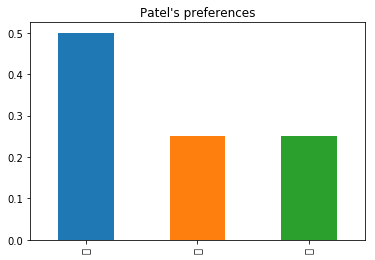

In [97]:
pd.Series(p).plot(kind='bar', title="Patel's preferences");

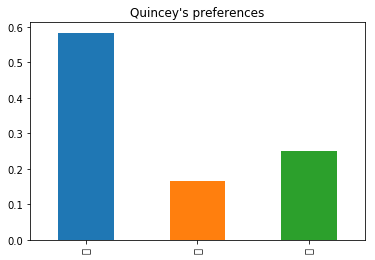

In [98]:
pd.Series(q).plot(kind='bar', title="Quincey's preferences");

In [105]:
def kl_divergence_two_discrete_distrubtions(p, q)-> float:
    """Implement K-L Divergence for two discrete distributions.
    You may use any math or numpy method. 
    You many NOT use any other package, including `scipy.special.kl_div`
    If you use another package, you'll get zero points.
    """
    import math
    import numpy as np
    keys = [i for i in p.keys()]
    output = []
    def entropy(r,s):
        if r > 0 and s > 0:
            return r*math.log(r/s,2)
        else:
            return 0
    for key in keys:
        r = p[key]
        s = q[key]
        output.append(entropy(r,s))
    kl_div = sum(output)
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    return kl_div

In [106]:
"""
5 points
Test code for the 'kl_divergence_two_discrete_distrubtions' function. 
This cell should NOT give any errors when it is run.
"""

kl_div = kl_divergence_two_discrete_distrubtions(p, q)
assert f"{kl_div:.6f}" == '0.035193'

kl_div = kl_divergence_two_discrete_distrubtions(q, p) # NOTE: The parameters are swapped
assert f"{kl_div:.6f}" != '0.035193' # NOTE: Not symmetrical

<br>
<br> 
<br>

----